### Importing Necessary Libraries

In [59]:
#For Data loading and preprocessing
import pandas as pd

#For matrix operations
import numpy as np

#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For splitting the data
from sklearn.model_selection import train_test_split

#For data preprocessing
from sklearn.preprocessing import StandardScaler

#For hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
#For appling LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report,precision_score, recall_score


#For math operations
import math 

#To see the progress of the iterations
#from tqdm import tqdm

#Performance metrices
from sklearn.metrics import roc_auc_score,roc_curve,auc,log_loss,confusion_matrix

#For encoding the features
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

#For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [2]:
data = pd.read_csv(r'C:\Users\lenovo\Downloads\weatherAUS.csv')

print("Total no.of points = {}".format(data.shape[0]))
data.head(5)

Total no.of points = 8425


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


<h2>1. Exploratory Data Analysis</h2> 

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

##### We can see there are many Null values in the data , lets try to fill  with proper values

##### From above plot it is clear that data set is imbalanced 

In [7]:
#Separating the data based on its class label.
data_yes = data[data['RainTomorrow']=='Yes']
data_no = data[data['RainTomorrow']=='No']

##### Now lets observe the most occuring values in every  column for both the cases 

In [8]:
#Observing the mode for all columns when RainTomorrow = Yes  
mode_values_for_yes = data_yes.mode()
mode_values_for_yes

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-03-14,PerthAirport,13.2,19.0,0.0,2.6,0.0,N,37.0,N,...,91.0,67.0,1014.1,1011.1,8.0,8.0,14.8,17.0,No,Yes
1,2009-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2009-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2009-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2009-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2009-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Observing the mode for all columns when RainTomorrow = No  
mode_values_for_no = data_no.mode()
mode_values_for_no

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2011-01-21,PerthAirport,12.0,20.0,0.0,4.0,11.0,E,35.0,SW,...,68.0,49.0,1020.0,1017.8,1.0,1.0,18.0,19.2,No,No
1,2011-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2011-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2011-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data_no['MaxTemp'].median()

24.1

### Replacing NaN values into meaningfull values

In [11]:
#For Temparatures we cannot replace NaN values with 0, hence replacing NaN with its respective mode value
data_yes['MinTemp'].fillna(value=data_yes['MinTemp'].mode()[0],inplace=True )
data_no['MinTemp'].fillna(value=data_no['MinTemp'].mode()[0],inplace=True )

data_yes['MaxTemp'].fillna(value=data_yes['MaxTemp'].mode()[0],inplace=True )
data_no['MaxTemp'].fillna(value=data_no['MaxTemp'].mode()[0],inplace=True )


data_yes['Temp9am'].fillna(value=data_yes['Temp9am'].mode()[0],inplace=True )
data_no['Temp9am'].fillna(value=data_no['Temp9am'].mode()[0],inplace=True )

data_yes['Temp3pm'].fillna(value=data_yes['Temp3pm'].mode()[0],inplace=True )
data_no['Temp3pm'].fillna(value=data_no['Temp3pm'].mode()[0],inplace=True )


# For humidity also 
data_yes['Humidity9am'].fillna(value=data_yes['Humidity9am'].mode()[0],inplace=True )
data_no['Humidity9am'].fillna(value=data_no['Humidity9am'].mode()[0],inplace=True )



data_yes['Humidity3pm'].fillna(value=data_yes['Humidity3pm'].mode()[0],inplace=True )
data_no['Humidity3pm'].fillna(value=data_no['Humidity3pm'].mode()[0],inplace=True )

# For the rain fall feature we can replace NaN with 0.0 which says there is no rain fall
data_yes['Rainfall'].fillna(value=0.0,inplace=True)
data_no['Rainfall'].fillna(value=0.0,inplace=True)


data_yes['Pressure9am'].fillna(value=data_yes['Pressure9am'].median(),inplace=True )
data_no['Pressure9am'].fillna(value=data_no['Pressure9am'].median(),inplace=True )

data_yes['Pressure3pm'].fillna(value=data_yes['Pressure3pm'].median(),inplace=True )
data_no['Pressure3pm'].fillna(value=data_no['Pressure3pm'].median(),inplace=True )


data_yes['WindSpeed9am'].fillna(value=data_yes['WindSpeed9am'].median(),inplace=True )
data_no['WindSpeed9am'].fillna(value=data_no['WindSpeed9am'].median(),inplace=True )

data_yes['WindSpeed3pm'].fillna(value=data_yes['WindSpeed3pm'].median(),inplace=True )
data_no['WindSpeed3pm'].fillna(value=data_no['WindSpeed3pm'].median(),inplace=True )

#WindGustSpeed -- replacing with median
data_yes['WindGustSpeed'].fillna(value=data_yes['WindGustSpeed'].median(),inplace=True)
data_no['WindGustSpeed'].fillna(value=data_no['WindGustSpeed'].median(),inplace=True)







In [12]:
# For RainToday feature we cannot fill any value, so better to remove the NaN values 
data_yes.dropna(inplace=True)
data_no.dropna(inplace=True)

In [13]:
data_filled=[data_yes,data_no]

In [14]:
data_filled=pd.concat(data_filled)

In [15]:
data_filled.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [16]:
print("Percentage of removed points= {}%".format(100.00-(len(data_filled)*100/len(data))))

Percentage of removed points= 53.519668737060044%


In [17]:
# sorting the data based on data (Time based splitting)
data_filled=data_filled.sort_values(by='Date')

In [18]:
#Removing unwanted features, data and loaction  
data_final = data_filled.drop(['Date', 'Location',], axis=1)

In [19]:
data_final.shape

(3143, 21)

In [20]:
numerical = data._get_numeric_data().columns
categorical = set(data.columns) - set(numerical)

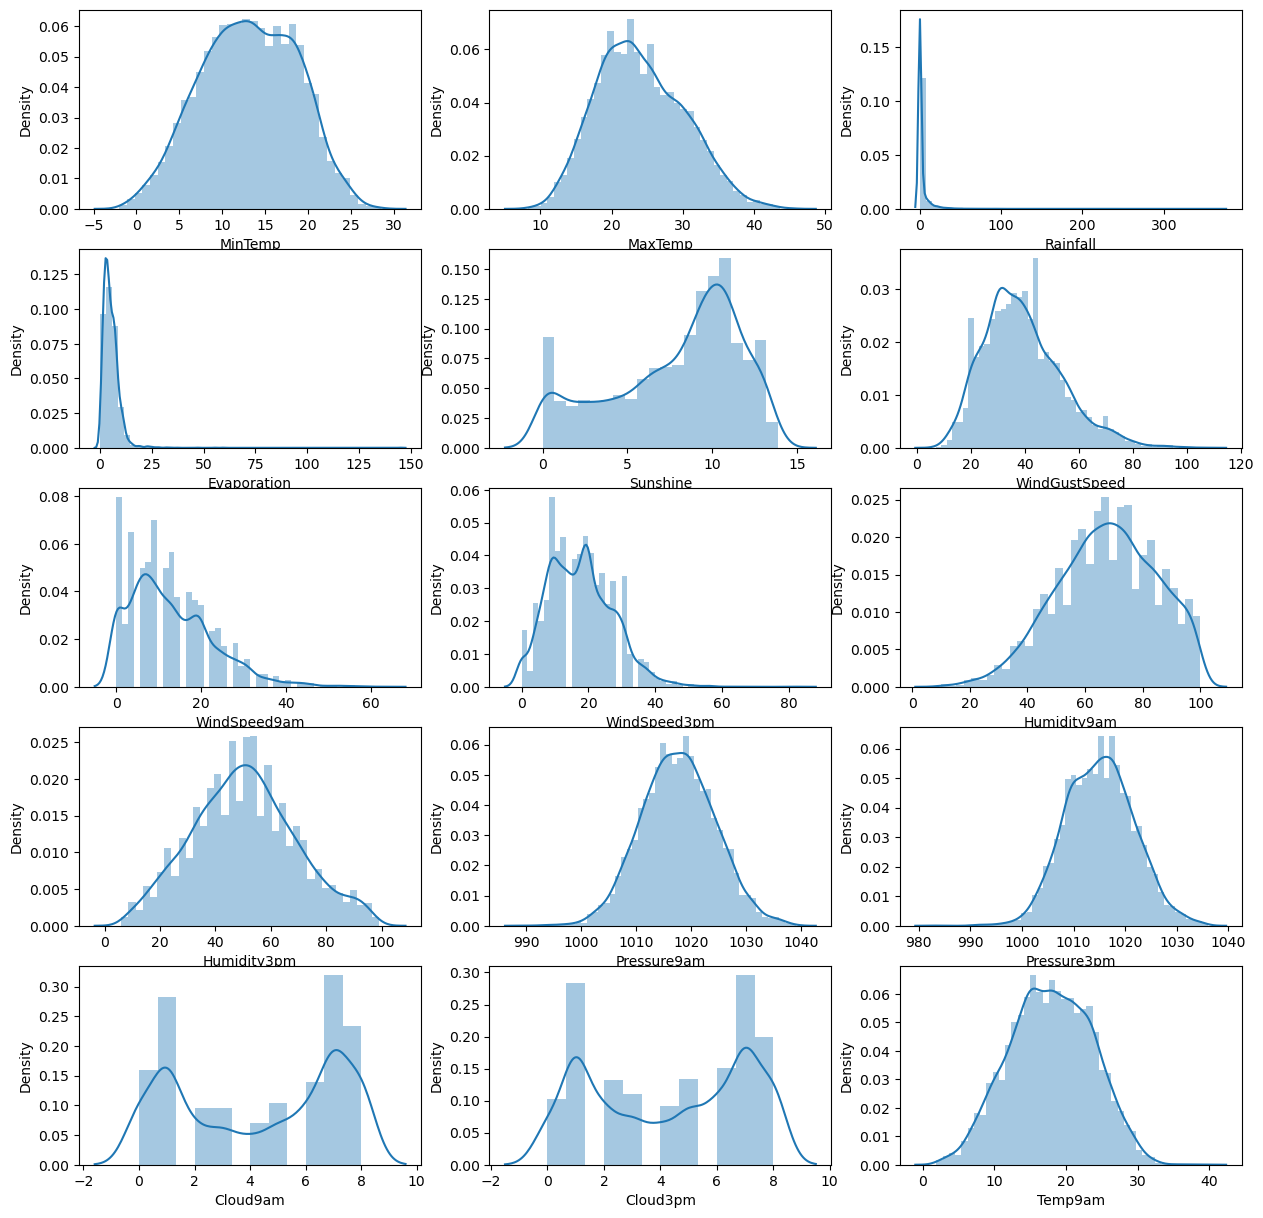

In [21]:
def plotHist():
    fig, ax =plt.subplots(5,3, figsize=(15,15))
    i=0;j=0;k=0
    while i<=4:
        while j<=2:
            sns.distplot(data[numerical[k]], ax=ax[i, j])
            j+=1;k+=1
        j=0;i+=1; 
    plt.show()
plotHist()

###### Now lets check for any outliers 

<Axes: >

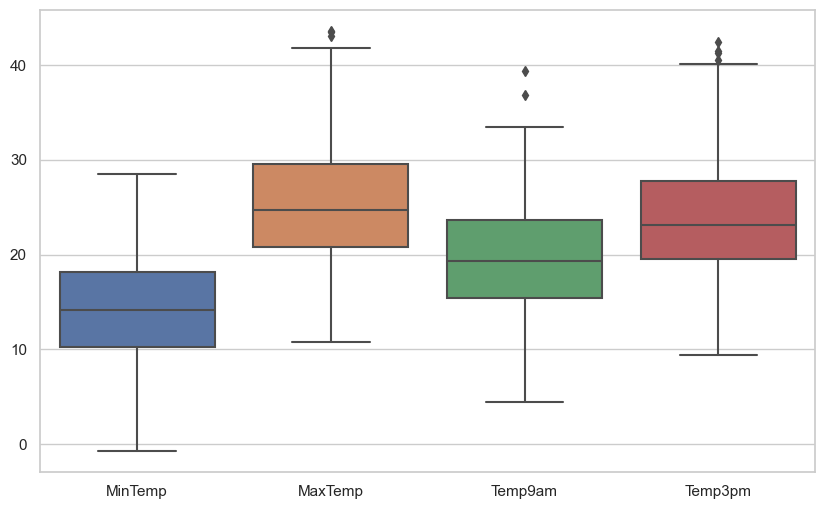

In [22]:
#Outliers we are checking only for numerical features
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

#### From the above box plot we can see that all temparature values are meaning full. no outliers found here

<Axes: >

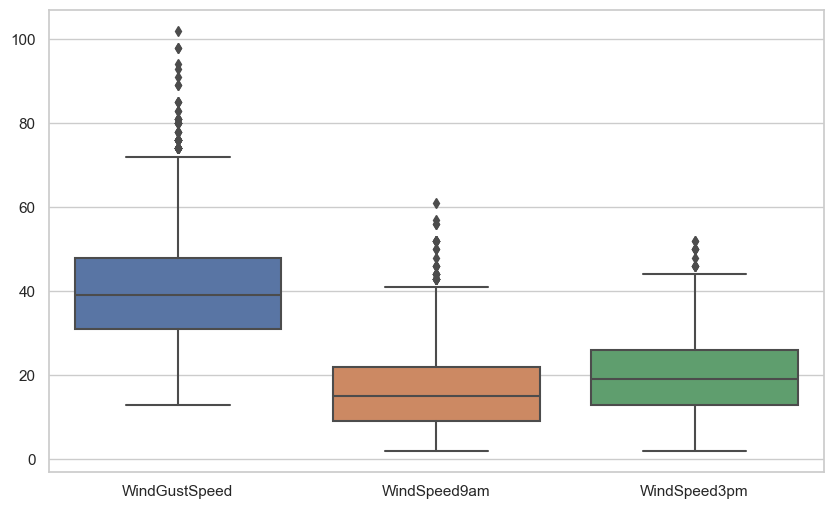

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']])

##### All wind speed values also are in sensible ranges

<Axes: >

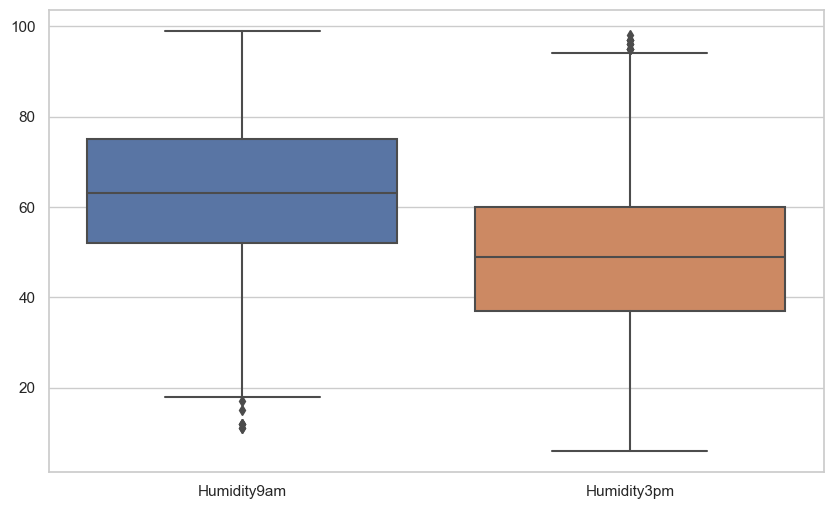

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Humidity9am','Humidity3pm']])

##### As we can see that there are some humidity values =0% which is almost never possible, hence removing 0 values 

In [25]:
data_final= data_final[data_final['Humidity3pm']!=0.0]
data_final= data_final[data_final['Humidity9am']!=0.0]

<Axes: >

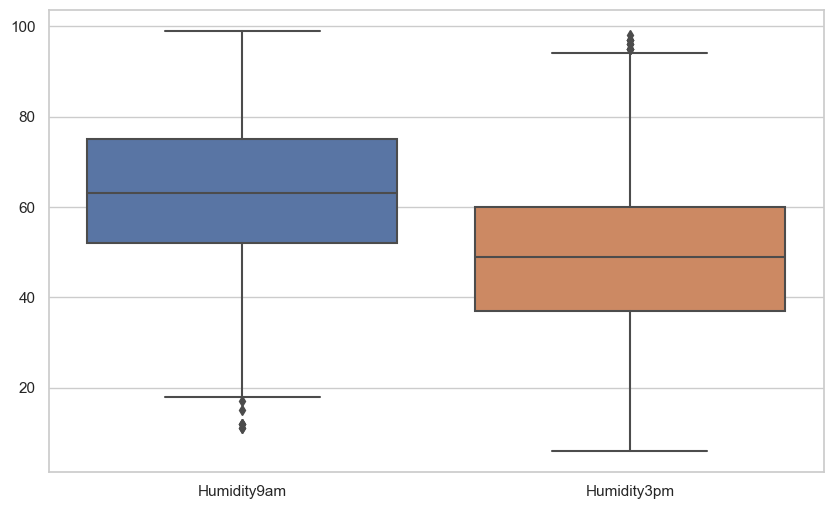

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Humidity9am','Humidity3pm']])

<Axes: >

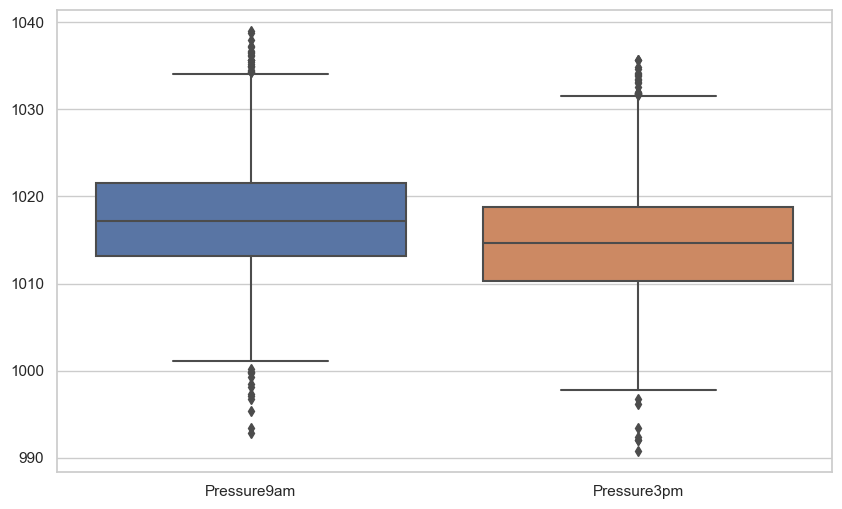

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Pressure9am','Pressure3pm']])

##### Here also there are no outliers, all pressure ranges also normally can happen in nature 

<Axes: >

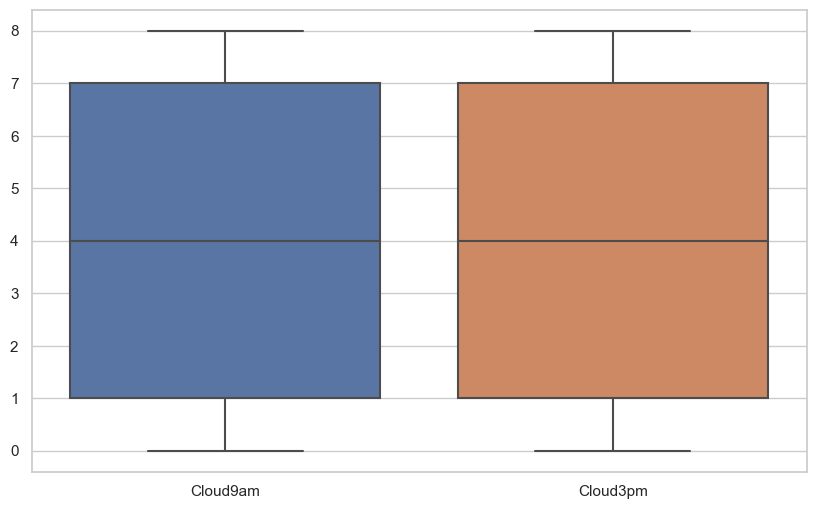

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Cloud9am','Cloud3pm']])

<Axes: >

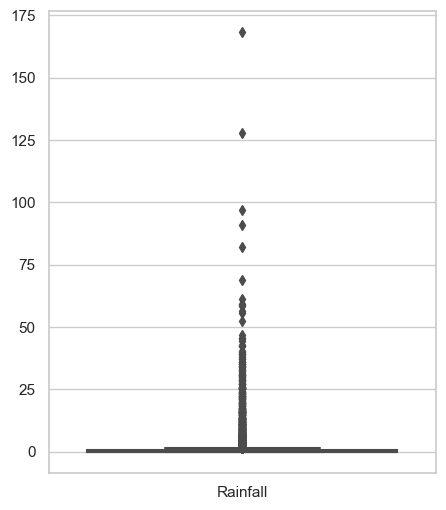

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=data_final[['Rainfall']])

<Axes: >

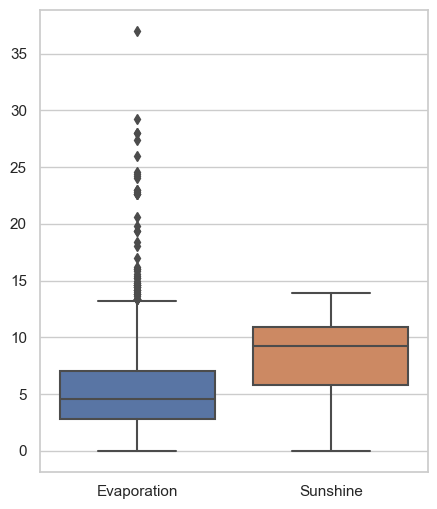

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=data_final[['Evaporation','Sunshine']])

##### Hence  the data is not suffering from outliers

<h2>2. Data pre-processing and Feature engineering</h2>

From the EDA we observed that there are few categorical variables they are :

WindGustDir

RainToday

WindDir9am

WindDir3pm

and 
class label = RainTomorrow

so encoding all these features into values 

In [31]:
WindGustDir_encode = LabelEncoder()
data_final['WindGustDir']=WindGustDir_encode.fit_transform(data_final['WindGustDir'])

WindDir9am_encode = LabelEncoder()
data_final['WindDir9am']=WindDir9am_encode.fit_transform(data_final['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
data_final['WindDir3pm']=WindDir3pm_encode.fit_transform(data_final['WindDir3pm'])

RainToday_encode = LabelEncoder()
data_final['RainToday']=RainToday_encode.fit_transform(data_final['RainToday'])

RainTomorrow_encode = LabelEncoder()
data_final['RainTomorrow']=RainTomorrow_encode.fit_transform(data_final["RainTomorrow"])

### Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.


In [32]:
Y= data_final['RainTomorrow']
X = data_final.drop(['RainTomorrow'],axis=1)

In [51]:
Y.value_counts()

RainTomorrow
0    2424
1     719
Name: count, dtype: int64

In [52]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.80, random_state=2, )
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(2514, 20)
(629, 20)
(2514,)
(629,)


In [54]:
scaler = StandardScaler()
#fitting standardization on train data only
scaler.fit(Xtrain)
XtrainSTD = scaler.transform(Xtrain)
XtestSTD = scaler.transform(Xtest)

In [60]:
rf = RandomForestClassifier(random_state=0)
parameters = {'bootstrap': [True, False],
              'min_samples_split':[2, 3, 4],
              'criterion':['entropy', 'gini'],
              'n_estimators':[100, 200]
             }
grid_search1 = GridSearchCV(estimator=rf, param_grid=parameters, refit='roc_auc', scoring=['accuracy', 'roc_auc'], cv=10, n_jobs=-1)
grid_search1 = grid_search1.fit(XtrainSTD, ytrain.values.ravel())

In [61]:
print("Best Parameters : ",grid_search1.best_params_)
print("Best AUC-ROC : ", grid_search1.best_score_)

Best Parameters :  {'bootstrap': True, 'criterion': 'entropy', 'min_samples_split': 3, 'n_estimators': 200}
Best AUC-ROC :  0.8989906621520459


In [62]:
#Building ranadom forest with these parameters
rf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', min_samples_split= 4, n_estimators= 200, random_state=0)
rf.fit(XtrainSTD, ytrain.values.ravel())
ypred = rf.predict(XtestSTD)
accuracy = accuracy_score(ypred, ytest)
print(accuracy)

0.8744038155802861


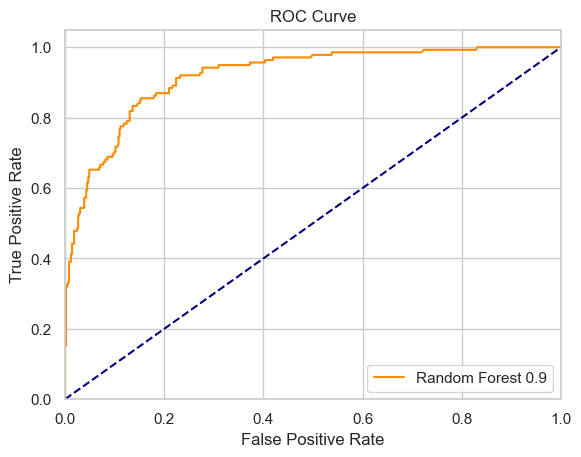

<Figure size 640x480 with 0 Axes>

In [63]:
def plot_curve(model, X_test, y_test,score, model_label):
    
    # function to plot roc curve for the given model
    y_score = pd.DataFrame(model.predict_proba(X_test))[1]
    fpr,tpr, threshold = roc_curve(y_test, y_score)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', label='{} {}'.format(model_label,np.round(score,2)))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig('roc random forest.png')
    
plot_curve(rf, XtestSTD, ytest, grid_search1.best_score_, "Random Forest")

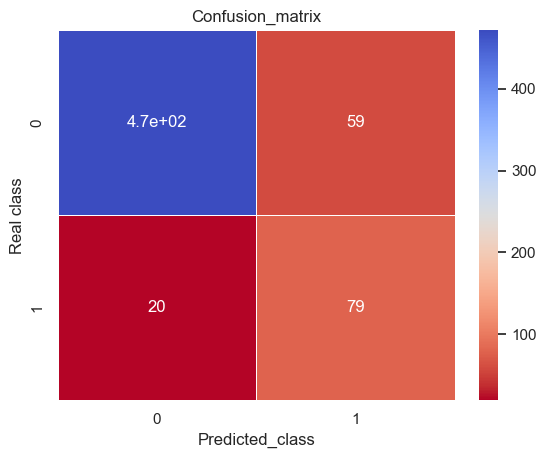

In [64]:
cnf_matrix = confusion_matrix(ypred, ytest)
sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

In [65]:
lr = LogisticRegression(random_state=0)
parameters = {'penalty': ['l1', 'l2'],
              'fit_intercept':[True, False]
             }
grid_search2 = GridSearchCV(estimator=lr, param_grid=parameters, refit='roc_auc', scoring=['accuracy', 'roc_auc'], cv=10, n_jobs=-1)
grid_search2 = grid_search2.fit(XtrainSTD, ytrain.values.ravel())

In [66]:
print("Best Parameters : ",grid_search2.best_params_)
print("Best AUC-ROC : ", grid_search2.best_score_)

Best Parameters :  {'fit_intercept': True, 'penalty': 'l2'}
Best AUC-ROC :  0.8939171704993729


In [67]:
lr = LogisticRegression(fit_intercept=True, penalty='l2', random_state=0)
lr.fit(XtrainSTD, ytrain)
predict = lr.predict(XtestSTD)
accuracy = accuracy_score(predict, ytest)
roc_score = roc_auc_score(predict, ytest)
print(accuracy)

0.8648648648648649


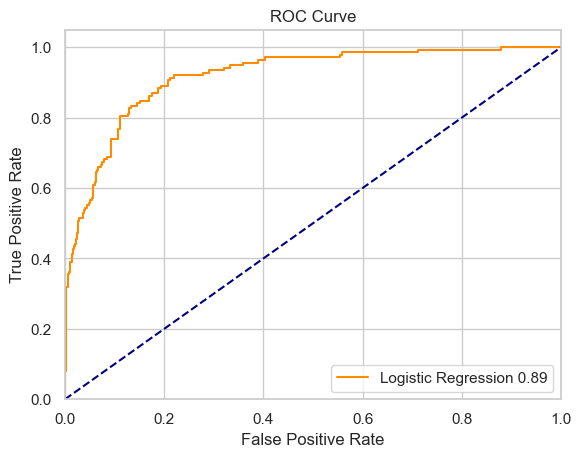

<Figure size 640x480 with 0 Axes>

In [69]:
def plot_curve(model, X_test, y_test,score, model_label):
    
    # function to plot roc curve for the given model
    y_score = pd.DataFrame(model.predict_proba(X_test))[1]
    fpr,tpr, threshold = roc_curve(y_test, y_score)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', label='{} {}'.format(model_label,np.round(score,2)))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig('roc2 logistic regression.png')
    
plot_curve(lr, XtestSTD, ytest, grid_search2.best_score_, "Logistic Regression")

## Conclusion : From above we can see the prediction of rainfall!!!!!

#### Problem Statement: 

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.
